Integrantes y sus cédulas:

Yamid Urrego Galvis           1000756146

Luis Gabriel Osorno Muñoz     1040976099


In [1]:
# Instalar librerias que se requieran

!pip install pyjanitor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.4/215.4 kB 4.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
from janitor import clean_names
from warnings import filterwarnings
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

filterwarnings("ignore")

ruta = "https://github.com/losornom-spec/PLE-2025-2/raw/main/Evaluaciones_Agropecuarias_Municipales_EVA_20250927.csv.zip"
datos = pd.read_csv(ruta,
                    compression="zip",
                    thousands=",",  # Se especifica que el separador de miles es la ","
                    decimal=".")    # Se especifica que el separador de decimales es el "."

# Exploración de la base de datos

In [3]:
# Verificamos que se haya leido correctamente

datos.head(5)

,CÓD. \nDEP.,DEPARTAMENTO,CÓD. MUN.,MUNICIPIO,GRUPO \nDE CULTIVO,SUBGRUPO \nDE CULTIVO,CULTIVO,DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO,AÑO,PERIODO,Área Sembrada\n(ha),Área Cosechada\n(ha),Producción\n(t),Rendimiento\n(t/ha),ESTADO FISICO PRODUCCION,NOMBRE \nCIENTIFICO,CICLO DE CULTIVO
0,15,BOYACA,15114,BUSBANZA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,1,1,1.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
1,25,CUNDINAMARCA,25754,SOACHA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,82,80,1440,18.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
2,25,CUNDINAMARCA,25214,COTA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,2,26,17.33,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
3,54,NORTE DE SANTANDER,54405,LOS PATIOS,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,3,3,48,16.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
4,54,NORTE DE SANTANDER,54518,PAMPLONA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,1,1,5,10.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO


In [4]:
datos.shape

(206068, 17)

In [5]:
datos.columns

Index(['CÓD. \nDEP.', 'DEPARTAMENTO', 'CÓD. MUN.', 'MUNICIPIO',
       'GRUPO \nDE CULTIVO', 'SUBGRUPO \nDE CULTIVO', 'CULTIVO',
       'DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO', 'AÑO', 'PERIODO',
       'Área Sembrada\n(ha)', 'Área Cosechada\n(ha)', 'Producción\n(t)',
       'Rendimiento\n(t/ha)', 'ESTADO FISICO PRODUCCION',
       'NOMBRE \nCIENTIFICO', 'CICLO DE CULTIVO'],
      dtype='object')

In [6]:
# Se identifican varios problemas relacionados con los nombres de las columnas,
# Se procede a limpiar los nombres de las columnas usando el modulo
# pyjanitor y la funcion clean_names, además caracteres especiales

datos = clean_names(datos, remove_special=True)
datos.columns

Index(['cd_dep_', 'departamento', 'cd_mun_', 'municipio', 'grupo_de_cultivo',
       'subgrupo_de_cultivo', 'cultivo',
       'desagregacin_regional_y_o_sistema_productivo', 'ao', 'periodo',
       'rea_sembrada_ha_', 'rea_cosechada_ha_', 'produccin_t_',
       'rendimiento_t_ha_', 'estado_fisico_produccion', 'nombre_cientifico',
       'ciclo_de_cultivo'],
      dtype='object')

In [7]:
datos.head()

,cd_dep_,departamento,cd_mun_,municipio,grupo_de_cultivo,subgrupo_de_cultivo,cultivo,desagregacin_regional_y_o_sistema_productivo,ao,periodo,rea_sembrada_ha_,rea_cosechada_ha_,produccin_t_,rendimiento_t_ha_,estado_fisico_produccion,nombre_cientifico,ciclo_de_cultivo
0,15,BOYACA,15114,BUSBANZA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,1,1,1.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
1,25,CUNDINAMARCA,25754,SOACHA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,82,80,1440,18.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
2,25,CUNDINAMARCA,25214,COTA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,2,26,17.33,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
3,54,NORTE DE SANTANDER,54405,LOS PATIOS,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,3,3,48,16.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
4,54,NORTE DE SANTANDER,54518,PAMPLONA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,1,1,5,10.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO


In [8]:
# Se identifica que se esté leyendo correctamente las variables
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206068 entries, 0 to 206067
Data columns (total 17 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   cd_dep_                                       206068 non-null  int64  
 1   departamento                                  206068 non-null  object 
 2   cd_mun_                                       206068 non-null  int64  
 3   municipio                                     206067 non-null  object 
 4   grupo_de_cultivo                              206068 non-null  object 
 5   subgrupo_de_cultivo                           206068 non-null  object 
 6   cultivo                                       206068 non-null  object 
 7   desagregacin_regional_y_o_sistema_productivo  206068 non-null  object 
 8   ao                                            206068 non-null  int64  
 9   periodo                                       20

In [9]:
# Se hace analisis de datos faltantes

# Se identifican principalmente datos faltantes en las variables
# rendimiento_t_ha_ y en nombre_cientifico, ademas de un dato
# faltante en municipio

datos.isna().sum()

,0
cd_dep_,0
departamento,0
cd_mun_,0
municipio,1
grupo_de_cultivo,0
subgrupo_de_cultivo,0
cultivo,0
desagregacin_regional_y_o_sistema_productivo,0
ao,0
periodo,0


<Axes: >

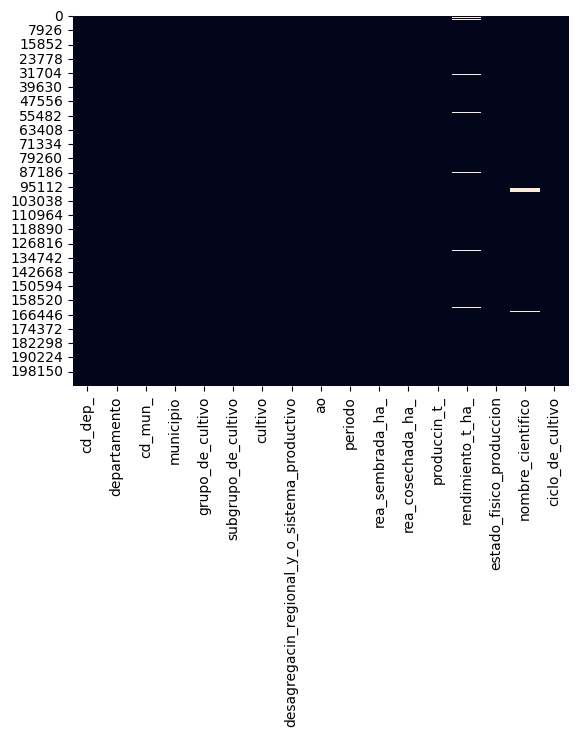

In [10]:
# Gráfico de datos faltantes
# Con el gráfico de NAN, se observa que si bien existen varios datos
# Faltantes, todos los registros están bien  leidos

sns.heatmap(datos.isna(), cbar=False)

# Se aplican ténicas para corregir los valores missing

In [11]:
# Se identifica que el valor missing para el municipio está en la fila 335.
# Se hará la busqueda de la fila y se imputará de acuerdo al codigo de municipio
# Con el código de municipio 27077, el municipio corresponde a BAJO BAUDO segun
# fuentes de la DIAN y DANE
# Se realiza la imputación

datos.query("municipio.isna()")
datos.iloc[335, 3] = "BAJO BAUDO"

# Solución de las preguntas planteadas:

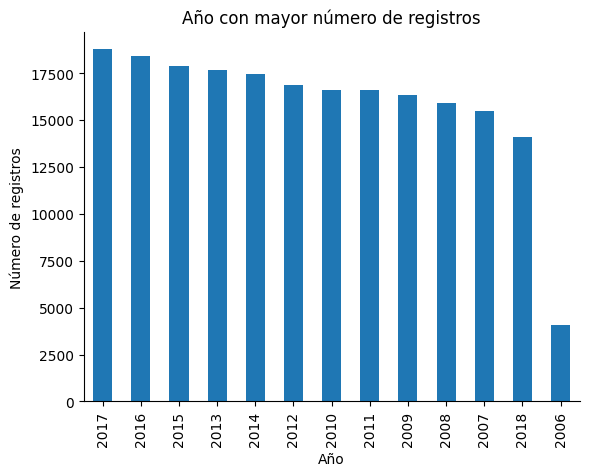

In [12]:
# (a). ¿Cuál es el año con mayor número de registros en la BD?

datos.ao.value_counts().plot(kind="bar").spines[["top", "right"]].set_visible(False)
plt.title("Año con mayor número de registros")
plt.xlabel("Año")
plt.ylabel("Número de registros")
plt.tick_params(top=False, right=False)

In [13]:
datos.ao.value_counts().head(10)

,count
ao,
2017,18756
2016,18399
2015,17900
2013,17649
2014,17434
2012,16856
2010,16619
2011,16592
2009,16318


# Respuesta item (a)

En base al grafico anterior:

- El año con mayor número de registros es 2017 con 18756 cultivos

- Seguido por el 2016 con 18399 registros

- En tercer lugar se encuentra el 2015 con 17900

Text(0, 0.5, 'Número de registros')

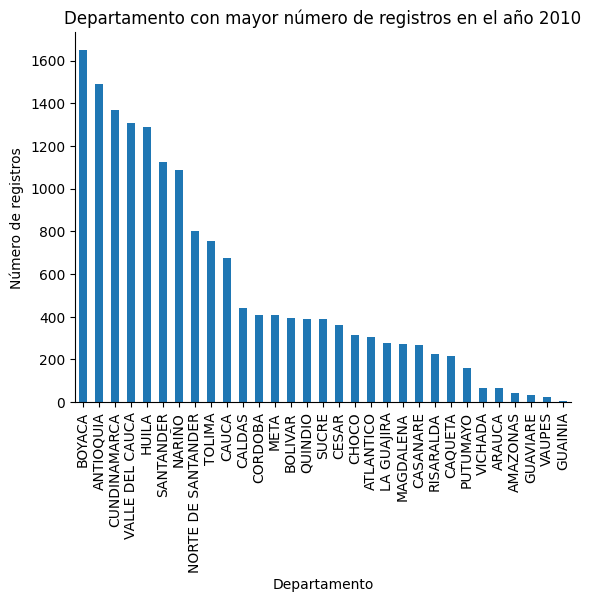

In [14]:
# (b). En el año 2010, ¿cuál es el departamento con mayor número de registros?

datos.query("ao == 2010").departamento.value_counts().plot(kind="bar").spines[["top", "right"]].set_visible(False)
plt.title("Departamento con mayor número de registros en el año 2010")
plt.xlabel("Departamento")
plt.ylabel("Número de registros")

In [15]:
datos.query("ao == 2010").departamento.value_counts().head()

,count
departamento,
BOYACA,1649
ANTIOQUIA,1489
CUNDINAMARCA,1368
VALLE DEL CAUCA,1308
HUILA,1288


# Respuesta al item (b)

El departamento con mayor número de registros en el 2010 es:

- Boyacá cuenta con 1649 registros

- Seguido por Antioquía con 1489

- En tercer lugar se encuentra Cundinamarca con 1368

Text(0, 0.5, 'Número de registros')

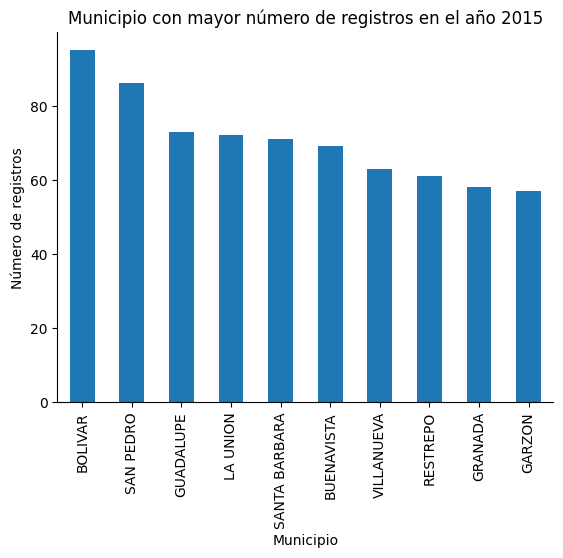

In [16]:
# (c). En el año 2015, ¿cuál es el municipio con mayor número de registros?

datos.query("ao==2015").municipio.value_counts().head(10).plot(kind="bar").spines[["top", "right"]].set_visible(False)
plt.title("Municipio con mayor número de registros en el año 2015")
plt.xlabel("Municipio")
plt.ylabel("Número de registros")

In [17]:
datos.query("ao==2015").municipio.value_counts().head(10)

,count
municipio,
BOLIVAR,95
SAN PEDRO,86
GUADALUPE,73
LA UNION,72
SANTA BARBARA,71
BUENAVISTA,69
VILLANUEVA,63
RESTREPO,61
GRANADA,58


# Respuesta al item (c)

- El municipio con mayor número de registros en el año 2015 es BOLIVAR con 95

- El segundo municipio con mayor número de registros es SAN PEDRO con 86

- El tercer municipio con mayor número de registros es GUADALUPE con 73

Text(0, 0.5, 'Número de registros')

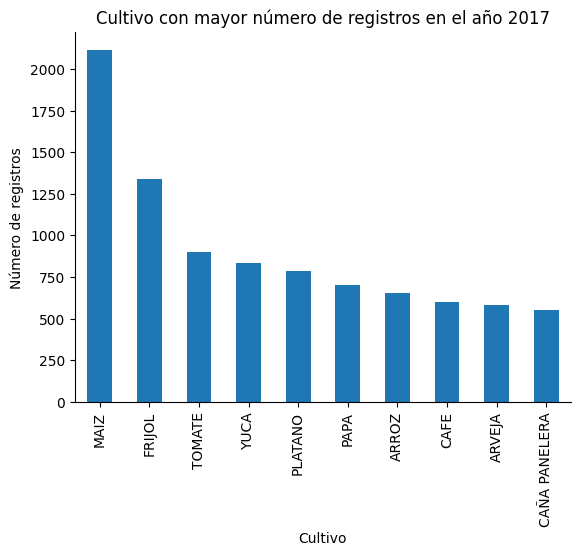

In [18]:
# (d). En el año 2017, ¿cuál es el cultivo con mayor número de registros?

datos.query("ao==2017").cultivo.value_counts().head(10).plot(kind="bar").spines[["top", "right"]].set_visible(False)
plt.title("Cultivo con mayor número de registros en el año 2017")
plt.xlabel("Cultivo")
plt.ylabel("Número de registros")

In [19]:
datos.query("ao==2017").cultivo.value_counts().head(10)

,count
cultivo,
MAIZ,2114
FRIJOL,1338
TOMATE,898
YUCA,832
PLATANO,786
PAPA,701
ARROZ,656
CAFE,600
ARVEJA,582


# Respuesta al item (d)

- El cultivo con mayor número de registros en el año 2017 es MAIZ con 2114

- El segundo tipo de cultivo con 1338 registros es el FRIJOL

- El tercer tipo de cultivo más frecuente es el TOMATE con 898 registros

In [20]:
# (e). ¿Cuántos registros tiene el cultivo de arveja en Boyacá?
# Previamente se verifica que no hayan variaciones de la palabra
# BOYACA y ARVEJA

datos.query("cultivo.str.contains('.*ARVEJA.*',regex=True) and departamento=='BOYACA'").cultivo.value_counts()

,count
cultivo,
ARVEJA,1788


# Respuesta al item (e)

En el departamento de BOYACA, se poseen 1788 registros donde se cultivó ARVEJA

In [21]:
# (f). ¿Cuál es la diferencia (en toneladas) en el total de producción entre los
# años 2015 y 2016 para el cultivo de papa en Boyacá?

tabla = datos.query("departamento=='BOYACA' and cultivo == 'PAPA'").query("ao==2015 or ao==2016").groupby("ao")["produccin_t_"].sum()
tabla[2016]-tabla[2015]

np.int64(231649)

# Respuesta al item (f)

La diferencia en toneladas de la produccion de PAPA en el departamento de BOYACA para los años 2015 y 2016 fue de 231649

Text(0, 0.5, 'Total de producción')

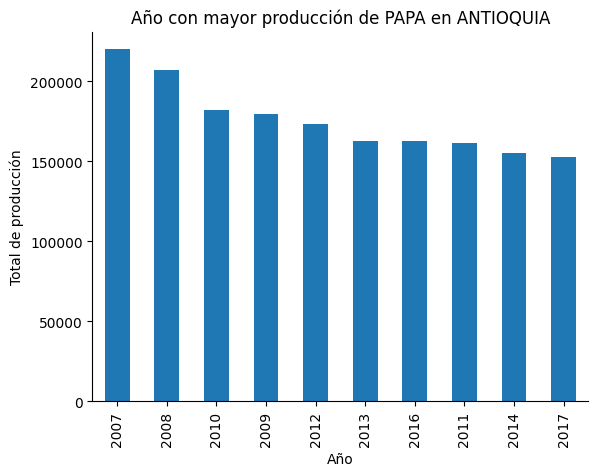

In [22]:
# (g). En Antioquia, ¿cuál fue el año con mayor producción de papa?

datos.query("departamento=='ANTIOQUIA' and cultivo=='PAPA'").groupby("ao")["produccin_t_"].sum().sort_values(ascending=False).head(10).plot(kind="bar").spines[["top", "right"]].set_visible(False)
plt.title("Año con mayor producción de PAPA en ANTIOQUIA")
plt.xlabel("Año")
plt.ylabel("Total de producción")

In [23]:
datos.query("departamento=='ANTIOQUIA' and cultivo=='PAPA'").groupby("ao")["produccin_t_"].sum().sort_values(ascending=False).head(10)

,produccin_t_
ao,
2007,220007
2008,206983
2010,182238
2009,179589
2012,173391
2013,162943
2016,162838
2011,161418
2014,155167


# Respuesta al item (g)

- El año con mayor producción de PAPA en ANTIOQUIA fue el 2007 con 220007 toneladas

- El segundo año con mayor producción de PAPA fue el 2008 con 206983 toneladas

- El tercer año con mayor producción de PAPA fue el 2010 con 182238 toneladas

Text(0, 0.5, 'Número de registros')

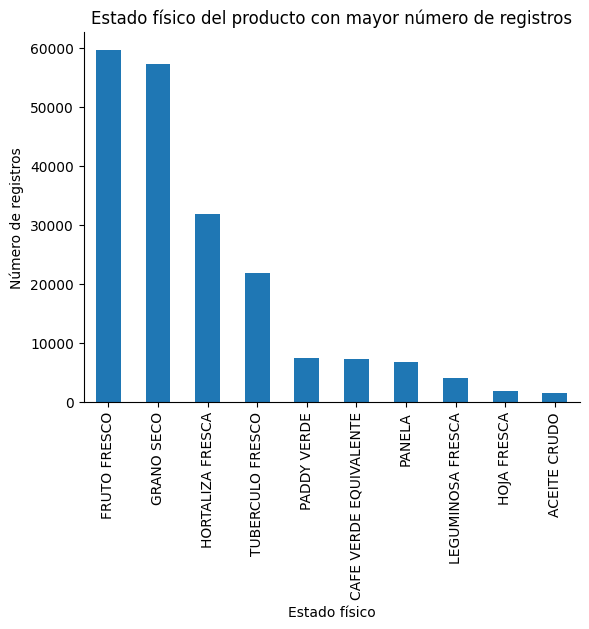

In [24]:
# (h). ¿Cuál es el estado físico del producto con mayor número de registros?

datos.estado_fisico_produccion.value_counts().head(10).plot(kind="bar").spines[["top", "right"]].set_visible(False)
plt.title("Estado físico del producto con mayor número de registros")
plt.xlabel("Estado físico")
plt.ylabel("Número de registros")

In [25]:
datos.estado_fisico_produccion.value_counts().head(10)

,count
estado_fisico_produccion,
FRUTO FRESCO,59682
GRANO SECO,57290
HORTALIZA FRESCA,31742
TUBERCULO FRESCO,21755
PADDY VERDE,7416
CAFE VERDE EQUIVALENTE,7263
PANELA,6669
LEGUMINOSA FRESCA,3919
HOJA FRESCA,1799


# Respuesta al item (h)

- El estado de cultivo con mayor número de registros es FRUTO FRESCO con 59682

- El segundo estado de cultivo con mayor número de registros es GRANO SECO con 57290

- El tercer estado de cultivo con mayor número de registro es HORTALIZA FRESCA 31742

Text(0, 0.5, 'Total de producción')

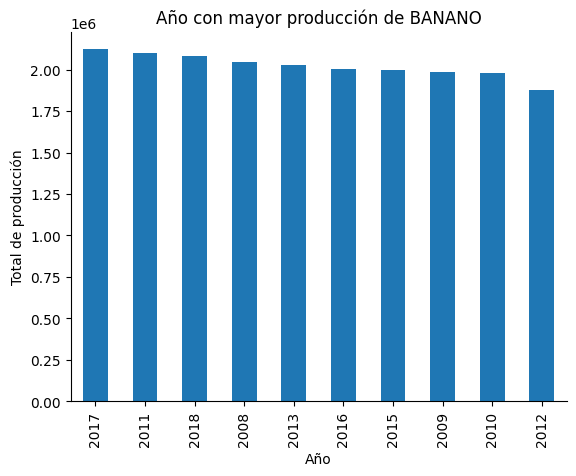

In [26]:
# (i). ¿Cuál es el año con mayor producción de banano?

datos.query("cultivo=='BANANO'").groupby("ao")["produccin_t_"].sum().sort_values(ascending=False).head(10).plot(kind="bar").spines[["top", "right"]].set_visible(False)
plt.title("Año con mayor producción de BANANO")
plt.xlabel("Año")
plt.ylabel("Total de producción")

In [27]:
datos.query("cultivo=='BANANO'").groupby("ao")["produccin_t_"].sum().sort_values(ascending=False).head(10)

,produccin_t_
ao,
2017,2120741
2011,2098581
2018,2083145
2008,2045828
2013,2026814
2016,2001544
2015,1997394
2009,1984050
2010,1977219


# Respuesta al item (i)

- El año con el mayor total de producción de BANANO fue el 2017 con 2120741.

- El segundo con la mayor producción total de BANANO fue el 2011 con 2098581.

- El tercer año con la mayor producción total de BANANO fue el 2018 con 2083145.


Text(0, 0.5, 'Total de Hectáreas sembradas')

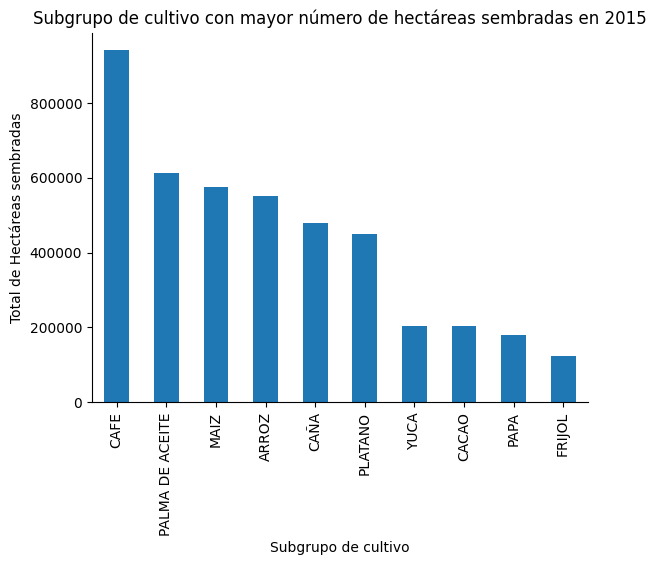

In [28]:
# (j). ¿Cuál es el subgrupo de cultivo con mayor número de hectáreas sembradas en 2015?

datos.query("ao==2015").groupby("subgrupo_de_cultivo")["rea_sembrada_ha_"].sum().sort_values(ascending=False).head(10).plot(kind="bar").spines[["top", "right"]].set_visible(False)
plt.title("Subgrupo de cultivo con mayor número de hectáreas sembradas en 2015")
plt.xlabel("Subgrupo de cultivo")
plt.ylabel("Total de Hectáreas sembradas")

In [29]:
datos.query("ao==2015").groupby("subgrupo_de_cultivo")["rea_sembrada_ha_"].sum().sort_values(ascending=False).head(10)

,rea_sembrada_ha_
subgrupo_de_cultivo,
CAFE,940876
PALMA DE ACEITE,611681
MAIZ,576185
ARROZ,552258
CAÑA,480010
PLATANO,448969
YUCA,203684
CACAO,203175
PAPA,178866


# Respuesta al item (j)

- En el año 2015 el subgrupo de cultivo con mayor número de hectareas fue CAFE con un total de 940876

- Para el año 2015 el segundo subgrupo con mayor número de hectareas fue la PALMA DE ACEITE con 611681

- El tercer subgrupo de cultivo con el mayor número de hectareas fue el MAIZ con un total de 576185




In [30]:
# (k). En el departamento de Cundinamarca, ¿cuál es la correlación entre área sembrada y área cosechada?

datos.query("departamento=='CUNDINAMARCA'")[['rea_sembrada_ha_', 'rea_cosechada_ha_']].corr()

,rea_sembrada_ha_,rea_cosechada_ha_
rea_sembrada_ha_,1.000000,0.993935
rea_cosechada_ha_,0.993935,1.000000


# Respuesta al item (k)

El coefiente de correlación entre área sembrada y área cosechada para el departamento de CUNDINAMARCA es de 0.993935, el cuál es muy alto y representa una relación positiva


Text(0, 0.5, 'Total de Hectáreas sembradas')

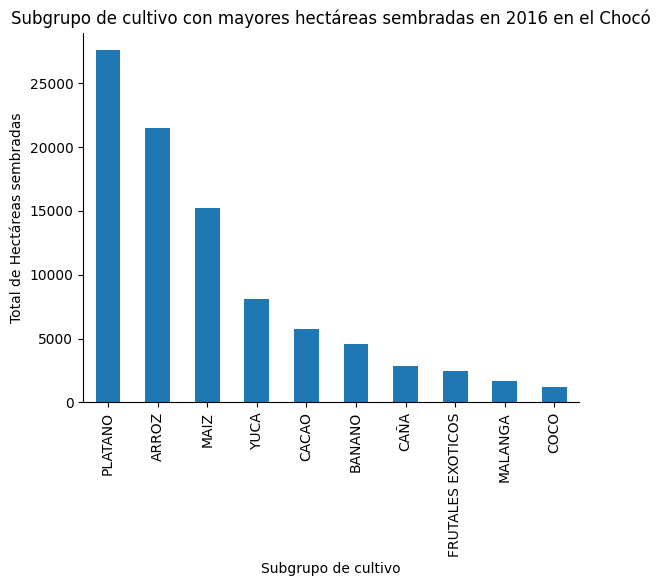

In [31]:
# (l). En el departamento del Chocó, ¿cuál es el subgrupo de cultivo con mayores hectáreas sembradas en 2016?

datos.query("departamento=='CHOCO' and ao==2016").groupby("subgrupo_de_cultivo")["rea_sembrada_ha_"].sum().sort_values(ascending=False).head(10).plot(kind="bar").spines[["top", "right"]].set_visible(False)
plt.title("Subgrupo de cultivo con mayores hectáreas sembradas en 2016 en el Chocó")
plt.xlabel("Subgrupo de cultivo")
plt.ylabel("Total de Hectáreas sembradas")


In [32]:
datos.query("departamento=='CHOCO' and ao==2016").groupby("subgrupo_de_cultivo")["rea_sembrada_ha_"].sum().sort_values(ascending=False).head(10)

,rea_sembrada_ha_
subgrupo_de_cultivo,
PLATANO,27572
ARROZ,21498
MAIZ,15231
YUCA,8078
CACAO,5708
BANANO,4607
CAÑA,2839
FRUTALES EXOTICOS,2467
MALANGA,1687


# Respuesta al item (l)

- En el departamento del CHOCO para el año 2016, el subgrupo de cultivo con mayores hectareas sembradas es el PLATANO con un total de 27572

- El segundo subgrupo de cultivo con mayores hectareas sembradas es el ARROZ con un total de 21498

- El tercer subgrupo de cultivo con mayores hectareas sembradas es el MAIZ con un total de 15231

Text(0, 0.5, 'Total de Hectáreas sembradas')

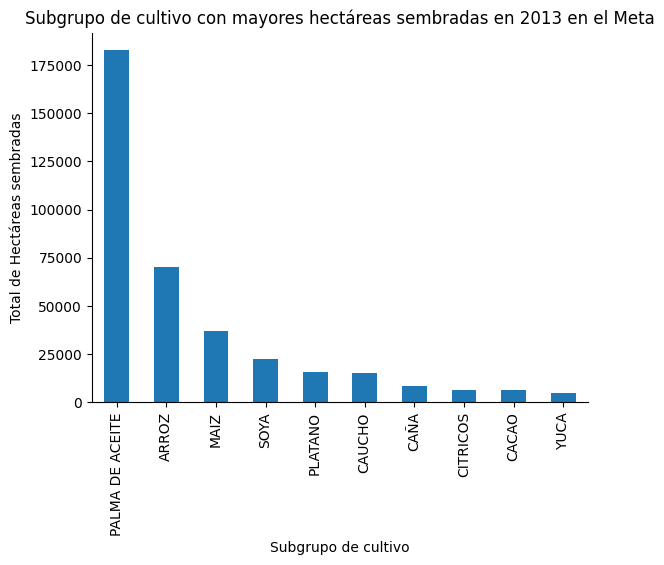

In [33]:
# (m). En el departamento del Meta, ¿cuál es el subgrupo de cultivo con mayores hectáreas sembradas en 2013?

datos.query("departamento=='META' and ao==2013").groupby("subgrupo_de_cultivo")["rea_sembrada_ha_"].sum().sort_values(ascending=False).head(10).plot(kind="bar").spines[["top", "right"]].set_visible(False)
plt.title("Subgrupo de cultivo con mayores hectáreas sembradas en 2013 en el Meta")
plt.xlabel("Subgrupo de cultivo")
plt.ylabel("Total de Hectáreas sembradas")


In [34]:
datos.query("departamento=='META' and ao==2013").groupby("subgrupo_de_cultivo")["rea_sembrada_ha_"].sum().sort_values(ascending=False).head(10)

,rea_sembrada_ha_
subgrupo_de_cultivo,
PALMA DE ACEITE,182715
ARROZ,70294
MAIZ,36987
SOYA,22230
PLATANO,15547
CAUCHO,15263
CAÑA,8225
CITRICOS,6424
CACAO,6212


# Respuesta al item (m)

- En el departamento del META para el 2013 el subgrupo de cultivo con el mayor total de hectareas sembradas fue el PALMA DE ACEITE con 182715 hectáreas

- El segundo mayor subgrupo de cultivo en el META para el año 2013 fue el ARROZ con 70294 hectáreas

- El tercer mayor subgrupo de cultivo para el departamento y ese año fue el MAIZ con 36987 hectáreas.

Text(0, 0.5, 'Total de Hectáreas sembradas')

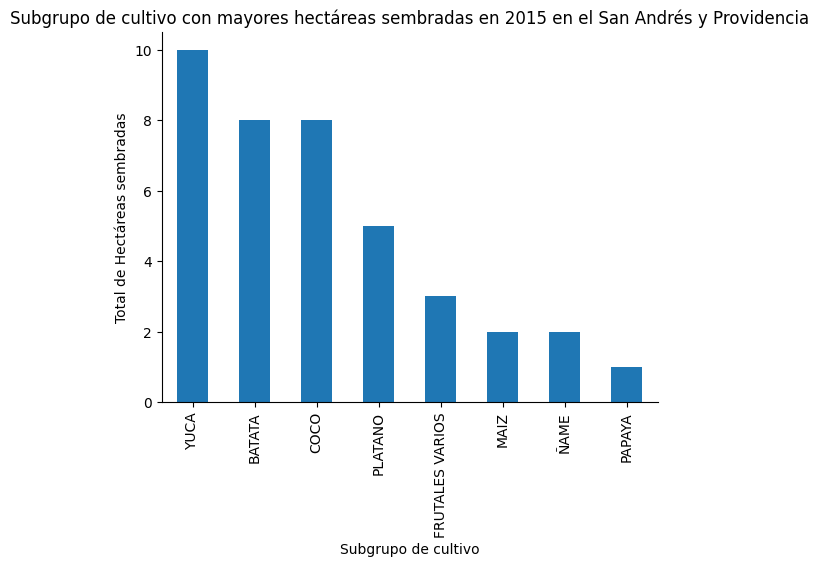

In [35]:
# (n). En el departamento del San Andrés y Providencia, ¿cuál es el subgrupo
# de cultivo con mayores hectáreas sembradas en 2015?

datos.query("departamento=='SAN ANDRES Y PROVIDENCIA' and ao==2015").groupby("subgrupo_de_cultivo")["rea_sembrada_ha_"].sum().sort_values(ascending=False).head(10).plot(kind="bar").spines[["top", "right"]].set_visible(False)
plt.title("Subgrupo de cultivo con mayores hectáreas sembradas en 2015 en el San Andrés y Providencia")
plt.xlabel("Subgrupo de cultivo")
plt.ylabel("Total de Hectáreas sembradas")

In [36]:
datos.query("departamento=='SAN ANDRES Y PROVIDENCIA' and ao==2015").groupby("subgrupo_de_cultivo")["rea_sembrada_ha_"].sum().sort_values(ascending=False).head(10)

,rea_sembrada_ha_
subgrupo_de_cultivo,
YUCA,10
BATATA,8
COCO,8
PLATANO,5
FRUTALES VARIOS,3
MAIZ,2
ÑAME,2
PAPAYA,1


# Respuesta al item (n)

- En el departamento de SAN ANDRES Y PROVIDENCIA para el año 2015 el subgrupo de cultivo que más se sembró fue la YUCA con un total de 10 hectáreas

- El segundo subgrupo de cultivo que más se sembró en el año 2015 fue BATATA con un total de 8 hectáreas

- El tercer subgrupo de cultivo que más se sembró en el año 2015 fue el COCO igualmente con 8 hectáreas.




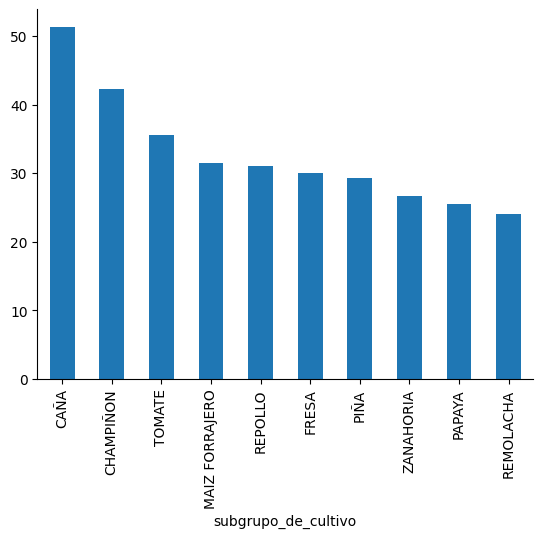

In [37]:
# (o). ¿Cuál es el subgrupo de cultivo que mayor rendimiento tuvo en Colombia
# entre 2007 y 2018?

Rendimiento = datos.query("ao>=2007 and ao<=2018").groupby("subgrupo_de_cultivo")[["rea_sembrada_ha_", "produccin_t_"]].sum()
Rendimiento = Rendimiento.assign(rendimiento_t_ha = Rendimiento.produccin_t_/Rendimiento.rea_sembrada_ha_)
Rendimiento.groupby("subgrupo_de_cultivo").rendimiento_t_ha.sum().sort_values(ascending=False).head(10).plot(kind="bar").spines[["top", "right"]].set_visible(False)

In [38]:
Rendimiento.groupby("subgrupo_de_cultivo").rendimiento_t_ha.sum().sort_values(ascending=False).head(10)

,rendimiento_t_ha
subgrupo_de_cultivo,
CAÑA,51.331217
CHAMPIÑON,42.307692
TOMATE,35.513067
MAIZ FORRAJERO,31.418669
REPOLLO,30.965909
FRESA,29.957569
PIÑA,29.306725
ZANAHORIA,26.629589
PAPAYA,25.487770


# Respuesta al item (o)

- El subgrupo de cultivo con mayor rendimiento fue la CAÑA con 51.331217 toneladas por hectárea.

- El segundo subgrupo de cultivo con mayor rendimiento fue el CHAMPIÑON con 42.307 toneladas por hectárea.

- El tercer subgrupo de cultivo con mayor rendimiento fue el TOMATE con 35.513 toneladas por hectárea.

Text(0.5, 0, 'Subgrupo de cultivo')

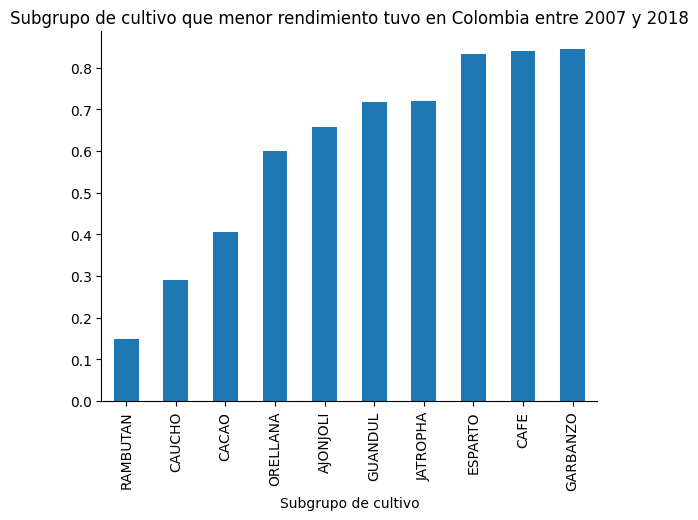

In [39]:
# (p). ¿Cuál es el subgrupo de cultivo que menor rendimiento tuvo en Colombia
# entre 2007 y 2018?

Rendimiento.groupby("subgrupo_de_cultivo").rendimiento_t_ha.sum().sort_values(ascending=True).head(10).plot(kind="bar").spines[["top", "right"]].set_visible(False)
plt.title("Subgrupo de cultivo que menor rendimiento tuvo en Colombia entre 2007 y 2018")
plt.xlabel("Subgrupo de cultivo")
# se debe sumar el total de un subcultivo en determinado año y dividirlo por el total
# se debe crear el rendimiento para cada subcultivo


In [40]:
Rendimiento.groupby("subgrupo_de_cultivo").rendimiento_t_ha.sum().sort_values(ascending=True).head(10)

,rendimiento_t_ha
subgrupo_de_cultivo,
RAMBUTAN,0.147826
CAUCHO,0.291272
CACAO,0.406364
ORELLANA,0.600000
AJONJOLI,0.658466
GUANDUL,0.717661
JATROPHA,0.719608
ESPARTO,0.833333
CAFE,0.840847


# Respuesta al item (p)

- El subgrupo de cultivo con menor rendimiento fue el RAMBUTAN con 0.1478 tonelada por hectárea.

- El segundo subgrupo de cultivo con menor rendimiento fue el CAUCHO con 0.2912 toneladas por hectárea.

- El tercer subgrupo de cultivo con menor rendimiento fue la CACAO con 0.4063 toneladas por hectárea.

Text(0, 0.5, 'Rendimiento (t/ha)')

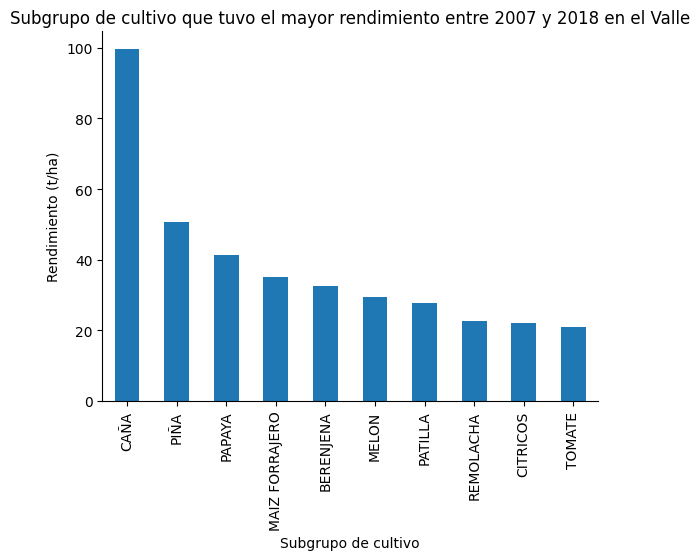

In [41]:
# (q). En el departamento del Valle, ¿cuál es el subgrupo de cultivo que tuvo
# el mayor rendimiento entre 2007 y 2018?

RendimientoValle = datos.query("departamento=='VALLE DEL CAUCA' and (ao>=2007 and ao<=2018)").groupby("subgrupo_de_cultivo")[["rea_sembrada_ha_", "produccin_t_"]].sum()
RendimientoValle = RendimientoValle.assign(rendimiento_t_ha_ = RendimientoValle.produccin_t_/RendimientoValle.rea_sembrada_ha_)

RendimientoValle.groupby("subgrupo_de_cultivo")["rendimiento_t_ha_"].sum().sort_values(ascending=False).head(10).plot(kind="bar").spines[["top", "right"]].set_visible(False)
plt.title("Subgrupo de cultivo que tuvo el mayor rendimiento entre 2007 y 2018 en el Valle")
plt.xlabel("Subgrupo de cultivo")
plt.ylabel("Rendimiento (t/ha)")

In [42]:
RendimientoValle.groupby("subgrupo_de_cultivo")["rendimiento_t_ha_"].sum().sort_values(ascending=False).head(10)

,rendimiento_t_ha_
subgrupo_de_cultivo,
CAÑA,99.671910
PIÑA,50.804300
PAPAYA,41.306721
MAIZ FORRAJERO,35.036969
BERENJENA,32.475862
MELON,29.569706
PATILLA,27.744526
REMOLACHA,22.629630
CITRICOS,21.966255


# Respuesta al item (q)

- En el departamento del VALLE para los años mencionados el subgrupo de cultivo que tuvo mayor rendimiento fue la CAÑA con un rendimiento total de 99.6719 toneladas por hectárea

- En el departamento del VALLE para los años en cuestión, el segundo subgrupo de cultivo con mayor rendimiento fue el PIÑA con 50.8043 toneladas por hectárea

- Para el mismo departamento en los años, el tercer subgrupo de cultivo de mayor rendimiento fue la PAPAYA con 41.3067 toneladas por hectárea

Text(0.5, 0, 'Departamento')

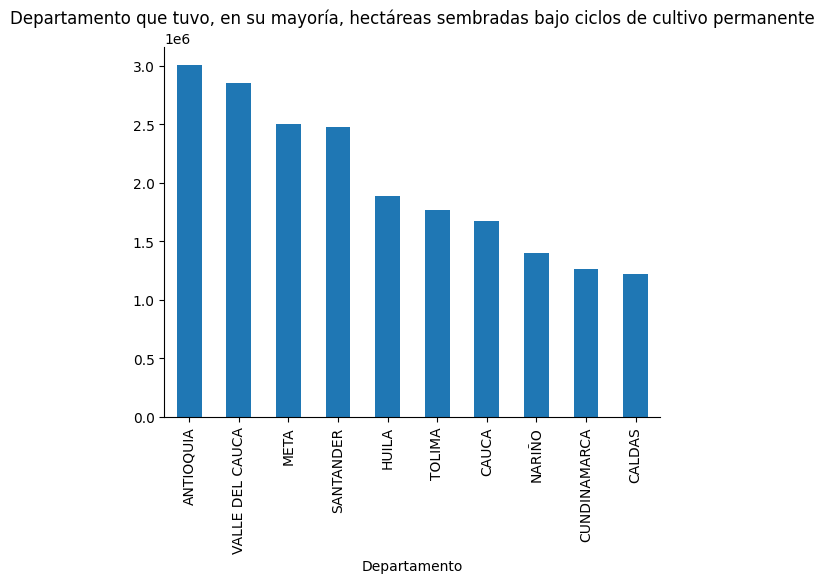

In [43]:
# (r). Entre el 2010 y 2018, ¿cuál es el departamento que tuvo, en su mayoría,
#      hectáreas sembradas bajo ciclos de cultivo permanente?

datos.query("ao>=2010 and ao<=2018 and ciclo_de_cultivo=='PERMANENTE' ").groupby(["departamento"])["rea_sembrada_ha_"].sum().sort_values(ascending=False).head(10).plot(kind="bar").spines[["top", "right"]].set_visible(False)
plt.title("Departamento que tuvo, en su mayoría, hectáreas sembradas bajo ciclos de cultivo permanente")
plt.xlabel("Departamento")


In [44]:
datos.query("ao>=2010 and ao<=2018 and ciclo_de_cultivo=='PERMANENTE' ").groupby(["departamento"])["rea_sembrada_ha_"].sum().sort_values(ascending=False).head(10)

,rea_sembrada_ha_
departamento,
ANTIOQUIA,3007566
VALLE DEL CAUCA,2855613
META,2503903
SANTANDER,2473120
HUILA,1882679
TOLIMA,1762190
CAUCA,1674959
NARIÑO,1399803
CUNDINAMARCA,1263493


# Respuesta al item (r)

- El departamento que tuvo en su mayoria hectáreas sembradas bajo ciclos de cultivo permanente es ANTIOQUIA con 3007566 hectáreas.

- El segundo departamento que tuvo en su mayoria hectáreas sembradas bajo ciclos de cultivo permanente es VALLE DEL CAUCA con 2855613 hectáreas.

- El tercer departamento que tuvo en su mayoria hectáreas sembradas bajo ciclos de cultivo permanente es META con 2503903 hectáreas.

Text(0.5, 0, 'Ciclo de cultivo')

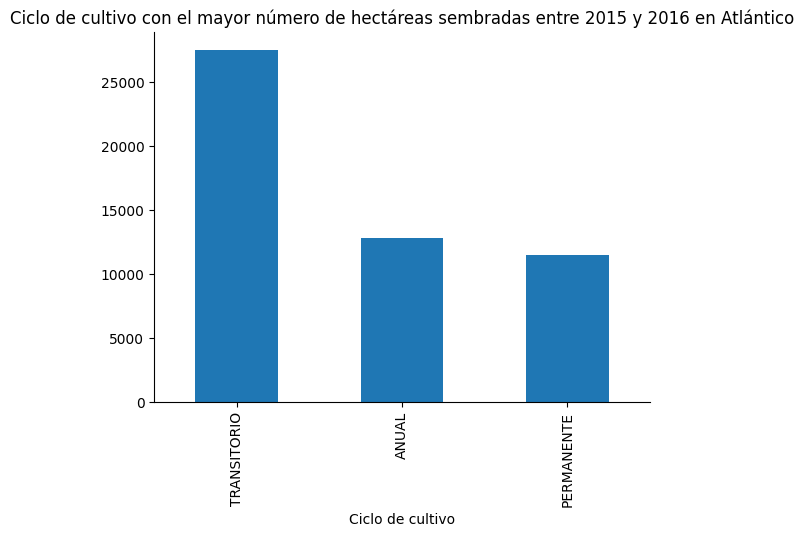

In [45]:
# (s). En Atlántico, ¿cuál fue el ciclo de cultivo con el mayor número de
# hectáreas sembradas entre 2015 y 2016?

datos.query("departamento=='ATLANTICO' and ao>=2015 and ao<=2016").groupby("ciclo_de_cultivo")["rea_sembrada_ha_"].sum().sort_values(ascending=False).plot(kind="bar").spines[["top", "right"]].set_visible(False)
plt.title("Ciclo de cultivo con el mayor número de hectáreas sembradas entre 2015 y 2016 en Atlántico")
plt.xlabel("Ciclo de cultivo")

In [46]:
datos.query("departamento=='ATLANTICO' and ao>=2015 and ao<=2016").groupby("ciclo_de_cultivo")["rea_sembrada_ha_"].sum().sort_values(ascending=False)

,rea_sembrada_ha_
ciclo_de_cultivo,
TRANSITORIO,27503
ANUAL,12792
PERMANENTE,11443


# Respuesta al item (s)

En Atlántico entre los años 2015 y 2016:

- El ciclo de cultivo con mayor número de hectáreas sembradas es el TRANSITORIO con 27503 hectáreas.

- En segundo lugar se tiene el ciclo de cultivo ANUAL con 12792 hectáreas

- Finalmente el ciclo de cultivo PERMANENTE con 11443 hectáreas

Text(0.5, 0, 'Municipio')

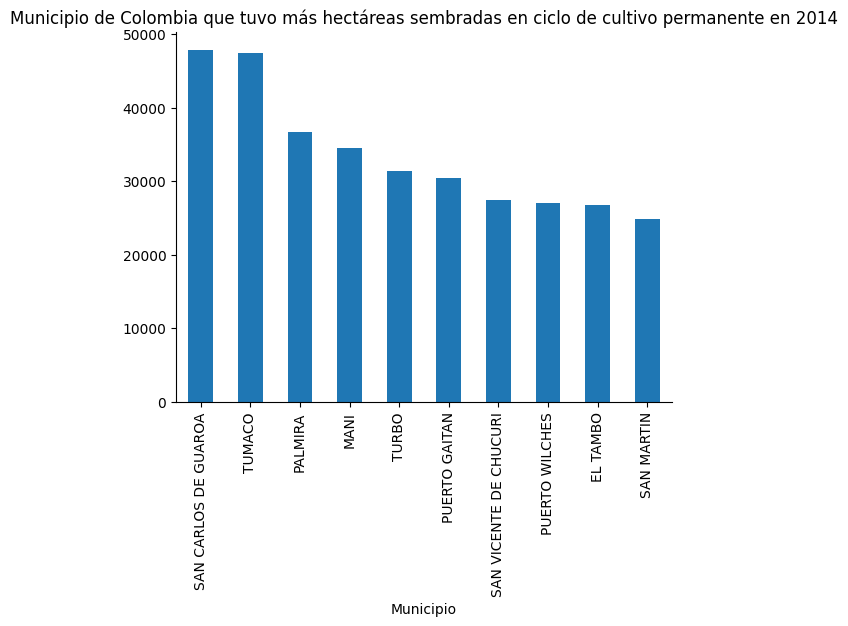

In [47]:
#(t). ¿Cuál es el municipio de Colombia que, en 2014, tuvo más hectáreas
#     sembradas en ciclo de cultivo permanente?

datos.query("ao==2014 and ciclo_de_cultivo=='PERMANENTE'").groupby("municipio")["rea_sembrada_ha_"].sum().sort_values(ascending=False).head(10).plot(kind="bar").spines[["top", "right"]].set_visible(False)
plt.title("Municipio de Colombia que tuvo más hectáreas sembradas en ciclo de cultivo permanente en 2014")
plt.xlabel("Municipio")

In [48]:
datos.query("ao==2014 and ciclo_de_cultivo=='PERMANENTE'").groupby("municipio")["rea_sembrada_ha_"].sum().sort_values(ascending=False).head(10)

,rea_sembrada_ha_
municipio,
SAN CARLOS DE GUAROA,47895
TUMACO,47516
PALMIRA,36702
MANI,34604
TURBO,31447
PUERTO GAITAN,30406
SAN VICENTE DE CHUCURI,27521
PUERTO WILCHES,27020
EL TAMBO,26816


# Respuesta al item (t)

- El municipio que tuvo más hectáreas sembradas en ciclo de cultivo PERMANENTE en 2014 fue SAN CARLOS DE GUAROA	con 47895 hectáreas.

- El segundo municipio con más hectáreas sembradas en ciclo de cultivo PERMANENTE en 2014 fue TUMACO con 47516 hectáreas.

- El municipio que tuvo más hectáreas sembradas en ciclo de cultivo PERMANENTE en 2014 fue PALMIRA	con 36702 hectáreas



Text(0, 0.5, 'Total de producción')

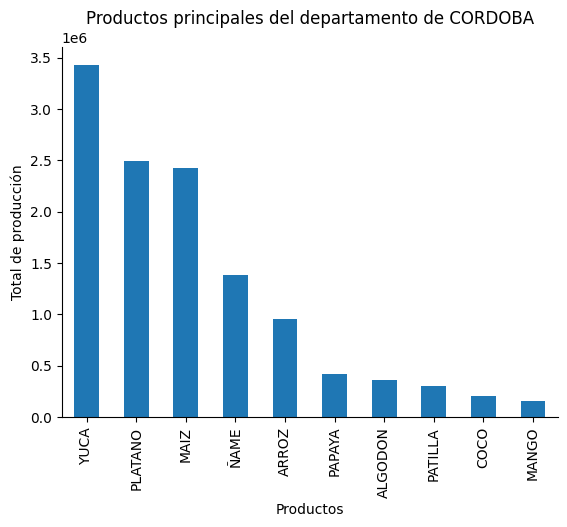

In [55]:
# (u). Seleccione un departamento o municipio que sea de su interés y encuentre
#      cuáles son los principales productos y cuál fue su evolución en términos de
#      productividad a lo largo de los años en la base de datos.

datos.query("departamento=='CORDOBA' and ao>=2007 and ao<=2018").groupby(["cultivo"])["produccin_t_"].sum().sort_values(ascending=False).head(10).plot(kind="bar").spines[["top", "right"]].set_visible(False)
plt.title("Productos principales del departamento de CORDOBA")
plt.xlabel("Productos")
plt.ylabel("Total de producción")


En base a la cantidad en totaneladas, sembarada de cada cultivo en el departamento de CORDOBA. En la figura anterior se puede observar que los cuatro princiales productos que se siembran son YUCA, PLATANO, MAIZ y ÑAME. Solo se consideran los registros entre los años 2007 a 2018, para que se obtengan los registros completos.

In [56]:
datos.query("departamento=='CORDOBA' and ao>=2007 and ao<=2018").groupby(["cultivo"])["produccin_t_"].sum().sort_values(ascending=False).head(10)

,produccin_t_
cultivo,
YUCA,3428881
PLATANO,2494330
MAIZ,2424257
ÑAME,1386173
ARROZ,951478
PAPAYA,413542
ALGODON,359280
PATILLA,299178
COCO,204135


En la celda atenterior, se observa que:

- El total de tonelas de YUCA es 3428881 que corresponde a la producción entre 2007 y 2018

- Por otro lado, el total de tonedas para el PLATANO es 2495330 igualmente para el mismo periodo.

- El MAIZ registró un total de 2424257 tonelas.

- Finalmente el ÑAME generó un total de 1386173 toneladas para los años entre 2007 y 2018.

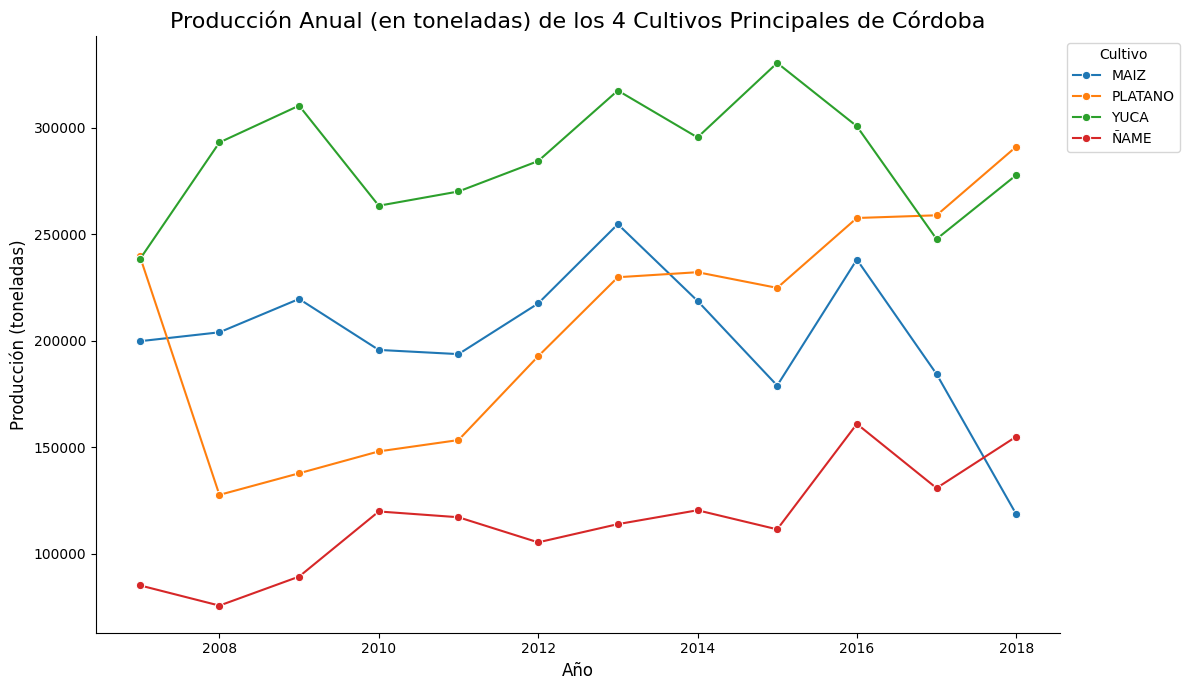

In [57]:
cultivos_principales = ['YUCA', 'PLATANO', 'MAIZ', 'ÑAME']
produccion_long = datos.query("departamento=='CORDOBA' and ao>=2007 and ao<=2018 and cultivo in @cultivos_principales").groupby(['ao', 'cultivo'])['produccin_t_'].sum().reset_index()

plt.figure(figsize=(12, 7))
sns.lineplot(
    data=produccion_long,
    x='ao',
    y='produccin_t_',
    hue='cultivo',
    marker='o',
    markers=True,
    dashes=False
    )

plt.title("Producción Anual (en toneladas) de los 4 Cultivos Principales de Córdoba", fontsize=16)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Producción (toneladas)", fontsize=12)
plt.legend(title="Cultivo", loc='upper left',bbox_to_anchor=(1, 1))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

# Comentarios del gráfico

En el departamento de CORDOBA
- El producto que mayor cantidad de toneladas mantuvo a lo largo de los años fue la YUCA, a exepción de los años 2017 y 2018 donde el PLATANO presentó mayor producción. Pero en general se nota una tendencia al alza.

- El ÑAME fue el producto con menor producción en este rango de tiempo. Pero muestra una tendencia clara de que está creciendo.

- La producción de YUCA y ÑAME presenta una variabilidad menor en comparación con el MAIZ y el PLATANO que son cultivos que tienden a ser más volatiles.

- El platano presentó un declive en su producción entre 2007 y 2008. Sin embargo, retomo su crecimiento de modo que para el 2018 logró superar los topes(maximos) de producción del ÑAME y el MAÍZ.

- Claramente la YUCA es el cultivo predominante en al región, lo cual hace sentido porque es una región apta para su producción.

- Tanto el MAIZ como el PLATANO son cultivos que también se prefieren en el departamento.

- Al finalizar el periodo de observación, se nota que el PLATANO pasa de ser un cultivo secundario o terciario, a compertir de manera directa con la YUCA, quien fue la que más predominaba.